In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [37]:
# init value
p=0.02 # 칠흑 드랍율
n=5000000 # 시뮬레이션 횟수 (1백만)
week=52 # 52 주 (1년)
success_p={19:0.7727, 21:0.4576, 22:0.2920} # 올파방 목표 성공률
target = 22 # 칠흑 완성 목표

In [38]:
# calculate
result=[]
sep=5000

for i in tqdm(range(int(n/sep))):
    is_drop=np.random.rand(sep,week,7)<p # [루컨,마깃,몽벨,거공,커포,고근,마도서]
    drop_count=is_drop.sum(axis=1) # shape : (iter, 7)
    max_drop=drop_count.max()

    is_completed=np.zeros((max_drop,sep,7),dtype=bool) # determine target success
    for ind,_ in enumerate(is_completed):
        is_completed[ind]=drop_count>=ind+1

    target_success=np.random.rand(max_drop,sep,7)<success_p[target] # target 달성 판별용 random 값
    target_success[:,:,6]=True # 마도서는 항상 성공

    is_completed=is_completed*target_success
    result.append(np.sum(np.sum(is_completed,axis=0,dtype=bool),axis=1))

result=np.array(result).flatten()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.70it/s]


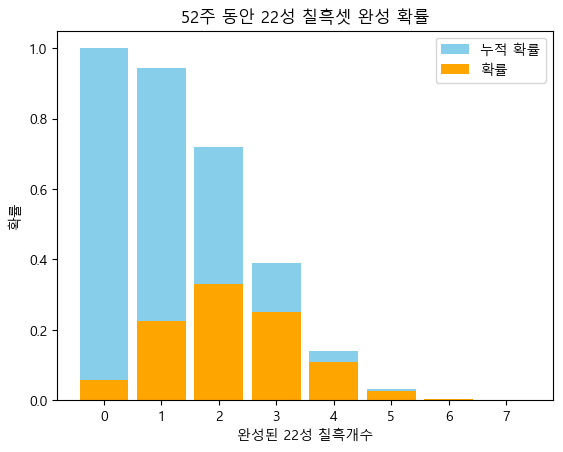

In [39]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("%d주 동안 %d성 칠흑셋 완성 확률"%(week,target))
plt.hist(result,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5],density=True, cumulative=-1, label='누적 확률', color='skyblue',rwidth=0.85)

plt.hist(result,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5],density=True, cumulative=False, label='확률', color='orange',rwidth=0.85)

plt.xlabel("완성된 %d성 칠흑개수"%target)
plt.ylabel("확률")
plt.legend(loc='upper right')
